# 9.6 Lab: Support Vector Machines

Imports

In [29]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

In [30]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

In [31]:
roc_curve = RocCurveDisplay.from_estimator

## 9.6.1 Support Vector Classifier

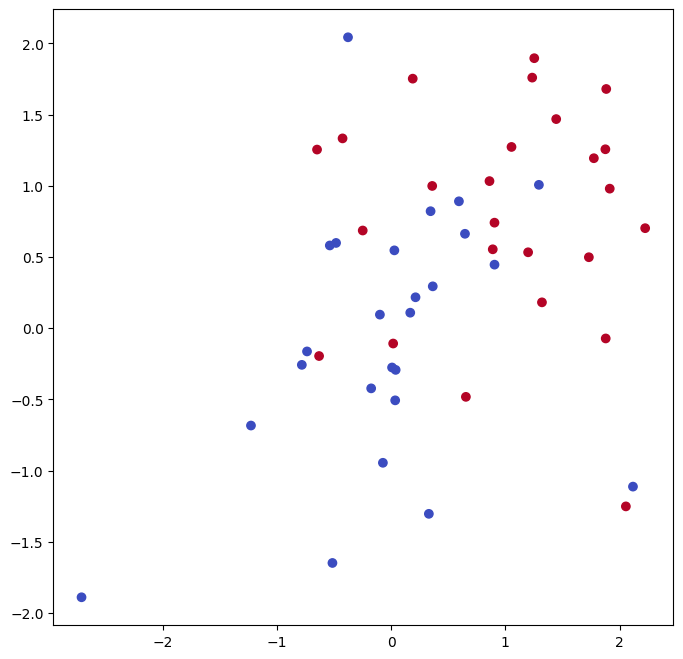

In [32]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1] * 25 + [1] * 25)
X[y==1] += 1
fig, ax = subplots(figsize=(8, 8))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=cm.coolwarm);

In [33]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

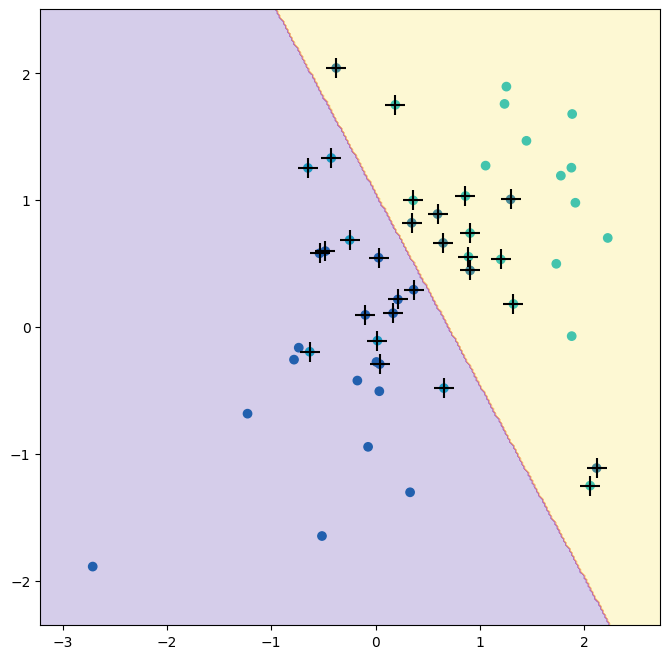

In [34]:
fig, ax = subplots(figsize=(8, 8))
plot_svm(X,
         y,
         svm_linear,
         ax=ax)

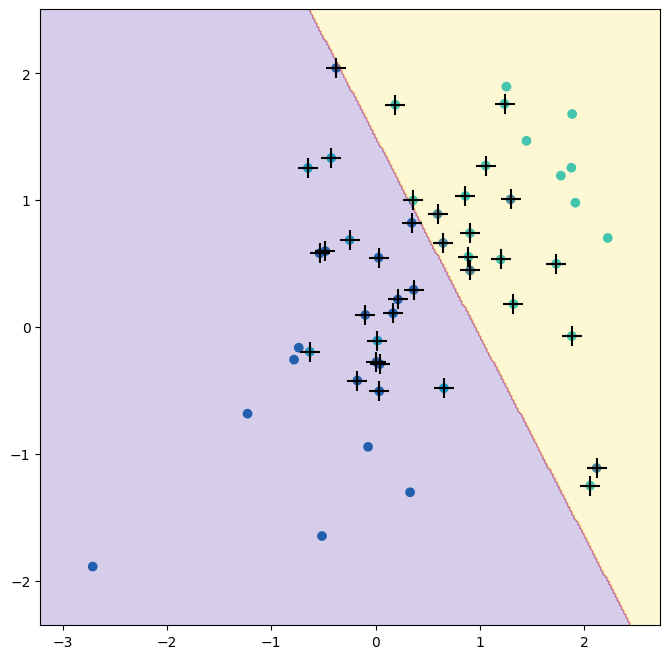

In [35]:
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)
fig, ax = subplots(figsize=(8, 8))
plot_svm(X,
         y,
         svm_linear_small,
         ax=ax)

In [36]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [37]:
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm_linear,
                        {"C": [0.001, 0.01, 0.1, 1, 5, 10, 100]},
                        refit=True,
                        cv=kfold,
                        scoring="accuracy")
grid.fit(X, y)
grid.best_params_

{'C': 1}

In [38]:
grid.cv_results_["mean_test_score"]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [39]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1] * 10 + [1] * 10)
X_test[y_test==1] += 1

In [40]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


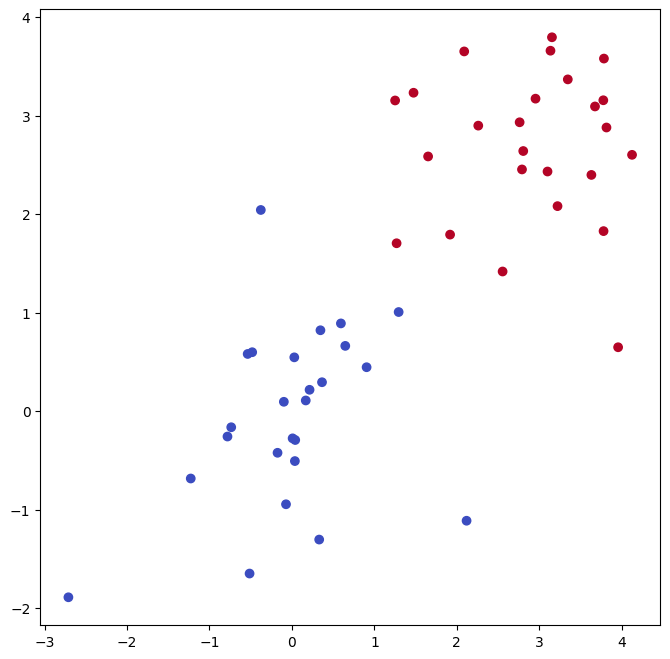

In [41]:
X[y==1] += 1.9;
fig, ax = subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.coolwarm);

In [42]:
svm_ = SVC(C=1e5, kernel="linear").fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


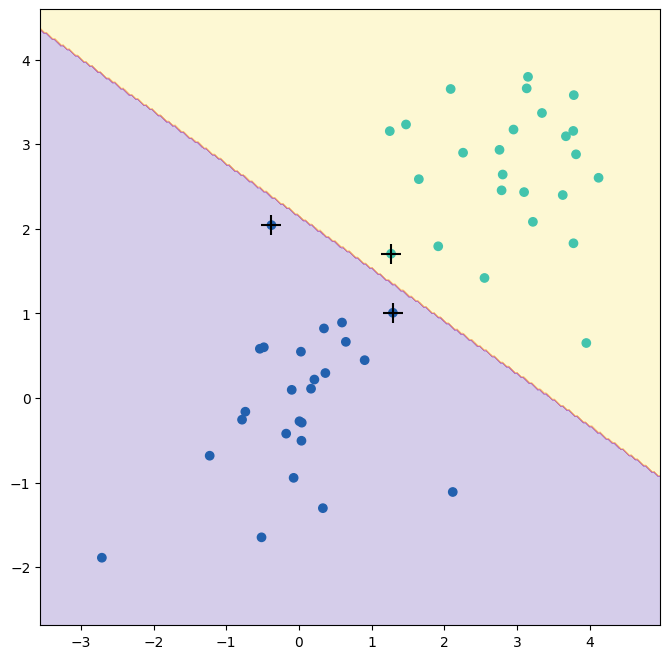

In [43]:
fig, ax = subplots(figsize=(8, 8))
plot_svm(X,
         y,
         svm_,
         ax=ax)

In [44]:
svm_ = SVC(C=0.1, kernel="linear").fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


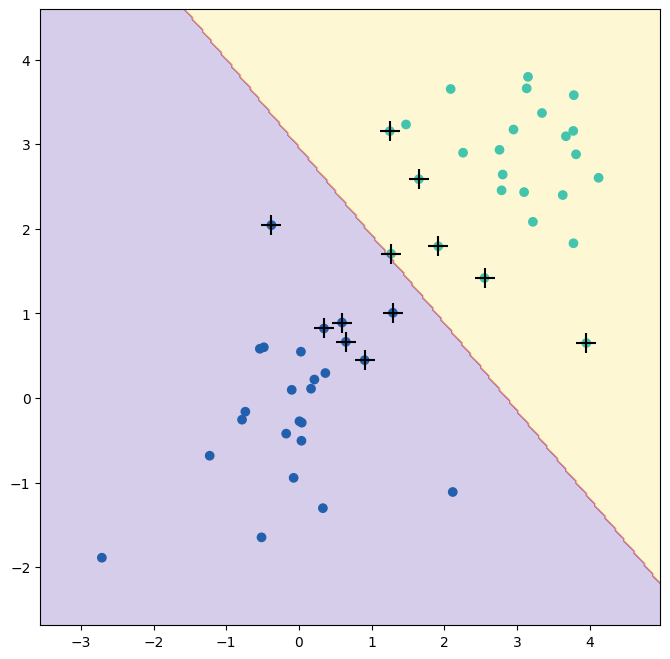

In [45]:
fig, ax = subplots(figsize=(8, 8))
plot_svm(X,
         y,
         svm_,
         ax=ax)

## 9.6.2 Support Vector Machine

In [46]:
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

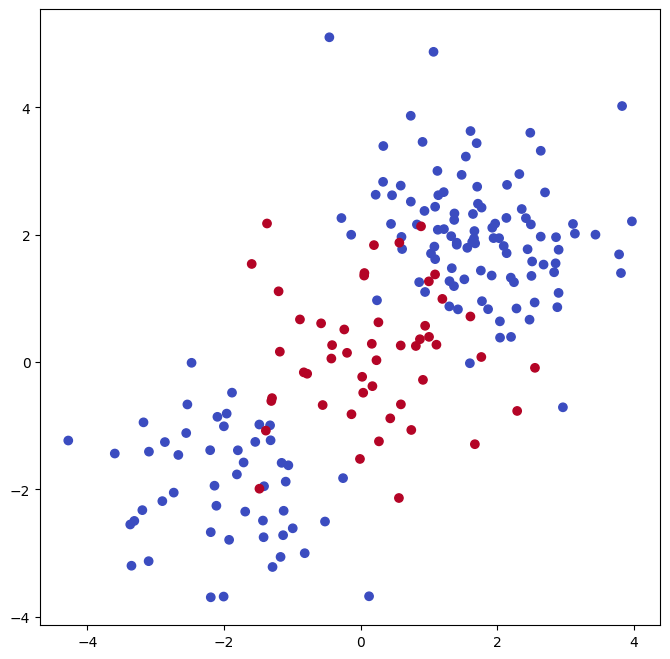

In [47]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.coolwarm);

In [48]:
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.5, random_state=0)
svm_rbf = SVC(kernel="rbf", gamma=1, C = 1)
svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=1)

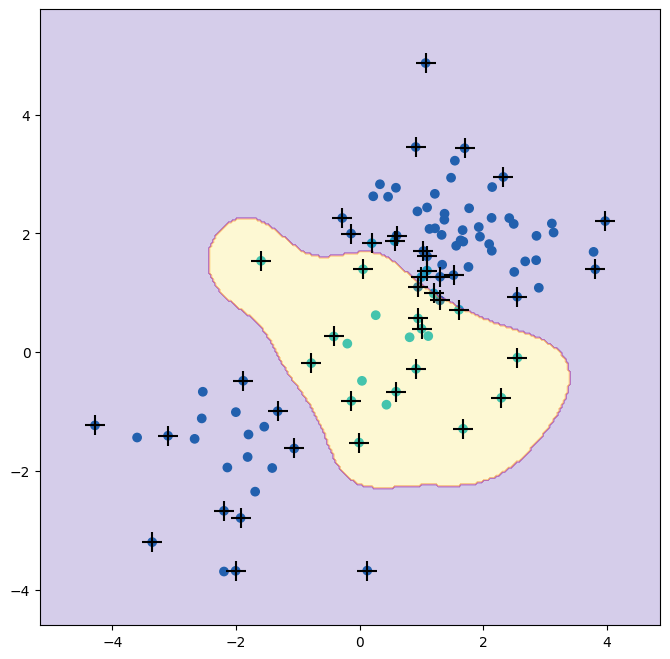

In [49]:
fig, ax = subplots(figsize=(8, 8))
plot_svm(X_train,
         y_train,
         svm_rbf,
         ax=ax)

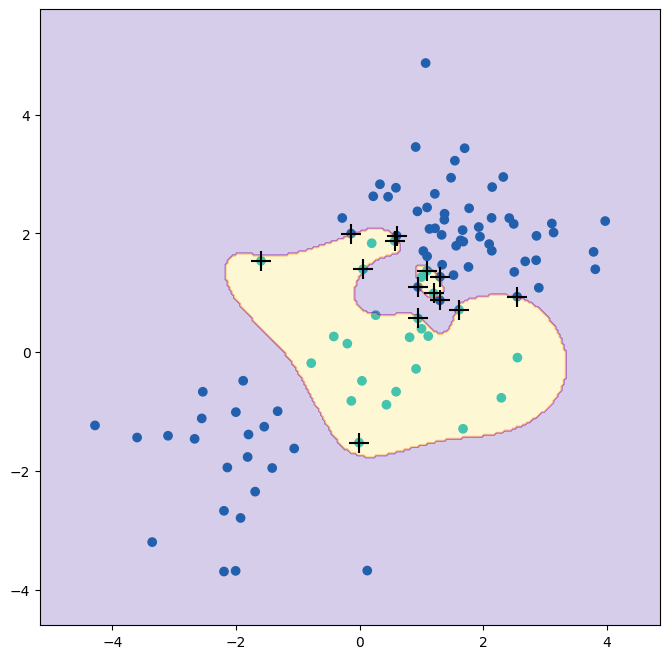

In [50]:
svm_rbf = SVC(kernel="rbf", gamma=1, C = 1e5)
svm_rbf.fit(X_train, y_train)
fig, ax = subplots(figsize=(8, 8))
plot_svm(X_train,
         y_train,
         svm_rbf,
         ax=ax)

In [51]:
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm_rbf,
                        {"C": [0.1, 1, 10, 100, 1000],
                         "gamma":[0.5, 1, 2, 3, 4]},
                        refit=True,
                        cv=kfold,
                        scoring="accuracy")
grid.fit(X, y)
grid.best_params_

{'C': 1, 'gamma': 0.5}

IndexError: index 105 is out of bounds for axis 0 with size 100

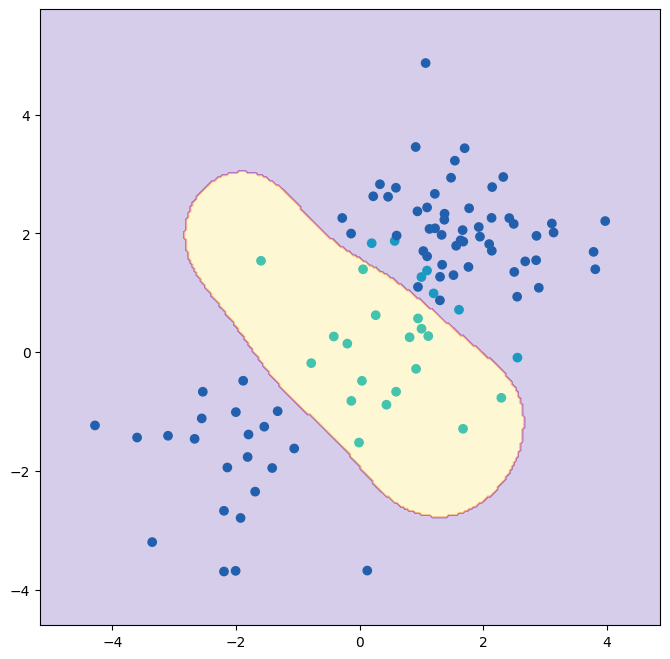

In [52]:
best_svm = grid.best_estimator_
fig, ax = subplots(figsize=(8, 8))
plot_svm(X_train,
         y_train,
         best_svm,
         ax=ax)

In [53]:
y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test, y_test)

Truth,1,2
Predicted,,
1,73,5
2,2,20


## 9.6.3 ROC Curves

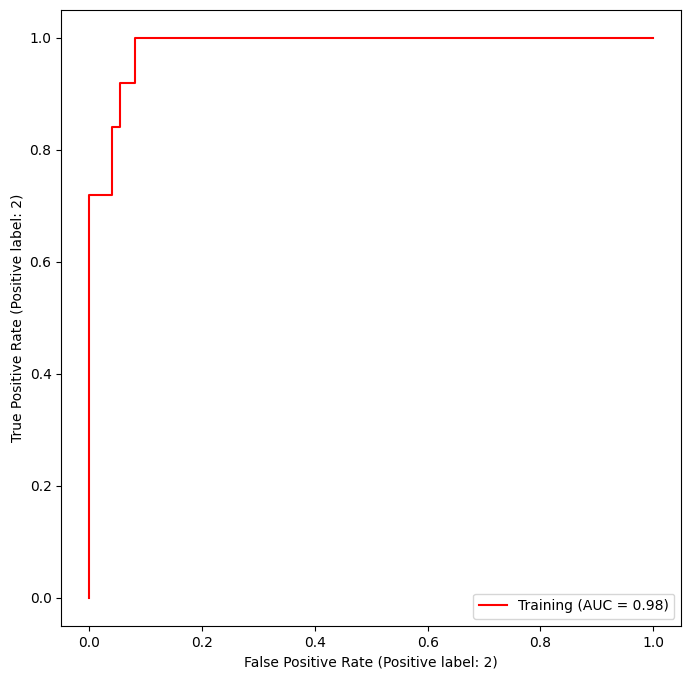

In [54]:
fig, ax = subplots(figsize=(8, 8))
roc_curve(best_svm,
          X_train,
          y_train,
          name="Training",
          color="r",
          ax=ax);

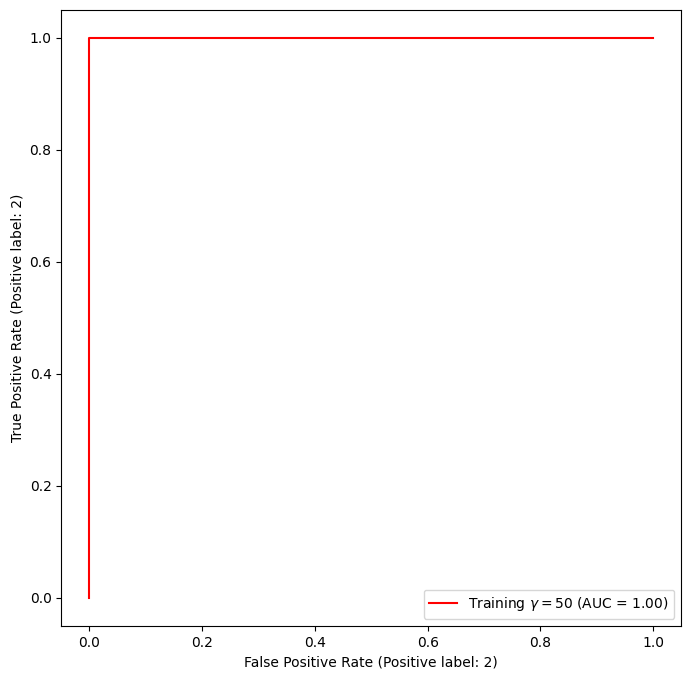

In [55]:
svm_flex = SVC(kernel="rbf",
               gamma=50,
               C=1)
svm_flex.fit(X_train, y_train)
fig, ax = subplots(figsize=(8, 8))
roc_curve(svm_flex,
          X_train,
          y_train,
          name="Training $\gamma=50$",
          color="r",
          ax=ax);

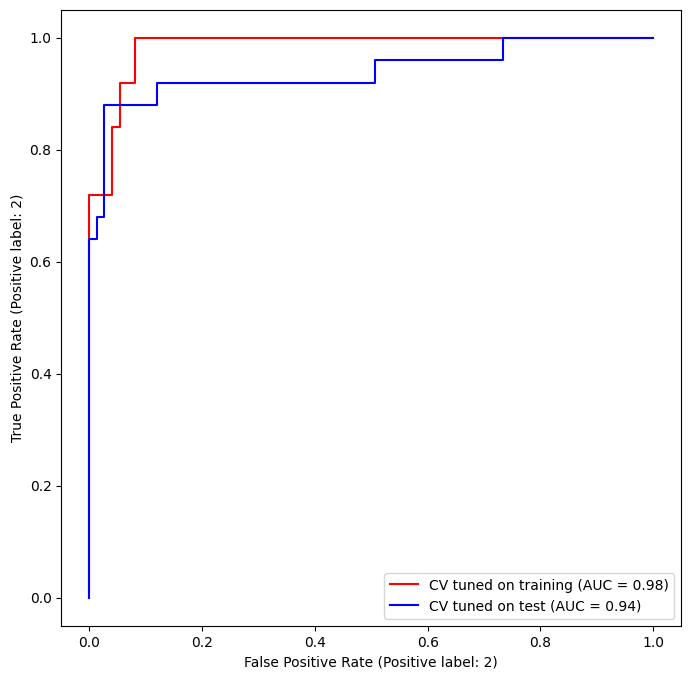

In [56]:
fig, ax = subplots(figsize=(8, 8))
for (X_, y_, c, name) in zip((X_train, X_test), (y_train, y_test), ("r", "b"), ("CV tuned on training", "CV tuned on test")):
    roc_curve(best_svm,
              X_,
              y_,
              name=name,
              ax=ax,
              color=c)

## 9.6.4 SVM with Multiple Classes

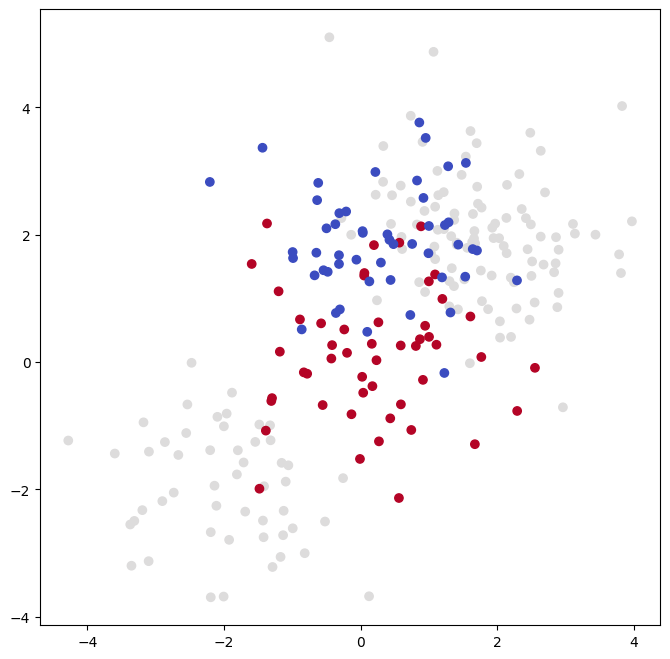

In [57]:
rng = np.random.default_rng(123)
X = np.vstack([X, rng.standard_normal((50, 2))])
y= np.hstack([y, [0]*50])
X[y==0, 1] += 2
fig, ax = subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.coolwarm);

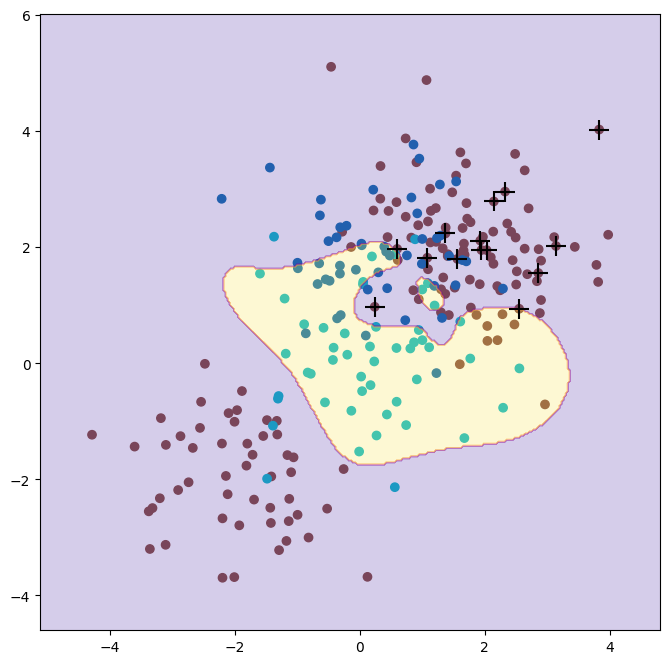

In [58]:
svm_rbf_3 = SVC(kernel="rbf", gamma=1, C = 10, decision_function_shape="ovo")
svm_rbf_3.fit(X, y)
fig, ax = subplots(figsize=(8, 8))
plot_svm(X,
         y,
         svm_rbf,
         ax=ax)

## 9.6.5 Application to Gene Expression Data

In [59]:
Khan = load_data("Khan")
Khan["xtrain"].shape, Khan['xtest'].shape

((63, 2308), (20, 2308))

In [60]:
khan_linear = SVC(kernel="linear", C=10)
khan_linear.fit(Khan["xtrain"], Khan["ytrain"])
confusion_table(khan_linear.predict(Khan["xtrain"]), Khan["ytrain"])

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [61]:
confusion_table(khan_linear.predict(Khan["xtest"]), Khan["ytest"])

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5
